In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools 
import random
import sys

GraphWithComponents is a cluster graph $M \in \mathcal{M_{\leq 2}}$  that has two or less components of connectivity

In [ ]:
class GraphWithComponents:
    def __init__(self, G: nx.Graph, firstComponent: nx.Graph, secondComponent: nx.Graph) -> nx.Graph:
        self.G = G
        self.firstComponent = firstComponent
        self.secondComponent = secondComponent
        pass

Distance between graphs $G_1 = (V, E_1), G_2 = (V, E_2)$ is a function

$p(G_1, G_2) = |E_1 \Delta E_2| = |E_1 \setminus E_2| + |E_2 \setminus E_1|$

In [ ]:
def distance(G: nx.Graph, H: nx.Graph) -> int:
    Gedges = G.edges
    Hedges = H.edges
    
    for edge in Gedges:
        if edge[0] > edge[1]:
            edge = (edge[1], edge[0])
            
    for edge in Hedges:
        if edge[0] > edge[1]:
            edge = (edge[1], edge[0])
            
    return len(set(Gedges) - set(Hedges)) + len(set(Hedges) - set(Gedges))


$A_v^+$ is amount of nodes $u \in A$ such that $(u, v) \in E$   

In [ ]:
def A_plus(G, A, v):
    res = []
    for u in A:
        if G.has_edge(v, u) and v != u:
            res.append((v, u))
    return len(res)

$A_v^-$ is amount of nodes $u \in A$ such that $(u, v) \notin E$   

In [ ]:
def A_minus(G, A, v):
    res = []
    for u in A:
        if not G.has_edge(v, u) and v != u:
            res.append((v, u))
    return len(res)

BBC Algorithm is a polinomial algorithm for finding $\mathcal{M_{\leq 2}}(V)$ cluster graph

In: Graph $G = (V, E)$

Out: Cluster graph $M \in \mathcal{M_{\leq 2}}$

In [ ]:
def BBC(graph):
    M = None 
    p = sys.maxsize
    
    for node in graph.nodes:
        temp = nx.Graph()
        temp.add_nodes_from(graph)

        N_g = list(graph.neighbors(node))
        N_g.append(node)

        not_N_g = list(set(graph.nodes) - set(N_g))

        v1 = list(itertools.combinations(N_g, 2))
        v2 = list(itertools.combinations(not_N_g, 2))

        temp.add_edges_from(v1)
        temp.add_edges_from(v2)

        if(distance(temp, graph) < p):
            p = distance(temp, graph)
            
            firstComponent = nx.Graph()
            firstComponent.add_edges_from(v1)

            secondComponent = nx.Graph()
            secondComponent.add_edges_from(v2)
            
            M = GraphWithComponents(temp, firstComponent, secondComponent)

    return M

Local Search Algorithm

In: Cluster Graph $M = M(X, Y) \in \mathcal{M_{\leq 2}}$

Out: Cluster Graph $\overline{M} = M(\overline{X}, \overline{Y}) \in \mathcal{M_{\leq 2}}$

In [ ]:
def LS(graphWithComponents):
    v_0 = None 
    u_0 = None
    sigma_v_0 = -sys.maxsize
    sigma_u_0 = -sys.maxsize
    
    for v in graphWithComponents.firstComponent.nodes:
        
        X_plus_v = A_plus(graphWithComponents.G, graphWithComponents.firstComponent.nodes, v)
        X_minus_v = A_minus(graphWithComponents.G, graphWithComponents.firstComponent.nodes, v)
        Y_plus_v = A_plus(graphWithComponents.G, graphWithComponents.secondComponent.nodes, v)
        Y_minus_v = A_minus(graphWithComponents.G, graphWithComponents.secondComponent.nodes, v)
        
        temp_sigma_v = X_minus_v - X_plus_v + Y_plus_v - Y_minus_v
        
        if temp_sigma_v > sigma_v_0:
            sigma_v_0 = temp_sigma_v
            v_0 = v
            
    for u in graphWithComponents.secondComponent.nodes:
        X_plus_u = A_plus(graphWithComponents.G, graphWithComponents.firstComponent.nodes, u)
        X_minus_u = A_minus(graphWithComponents.G, graphWithComponents.firstComponent.nodes, u)
        Y_plus_u = A_plus(graphWithComponents.G, graphWithComponents.secondComponent.nodes, u)
        Y_minus_u = A_minus(graphWithComponents.G, graphWithComponents.secondComponent.nodes, u)
        
        temp_sigma_u = Y_minus_u - Y_plus_u + X_plus_u - X_minus_u
        
        if(temp_sigma_u > sigma_u_0):
            sigma_u_0 = temp_sigma_u
            u_0 = u
    
    if sigma_v_0 <= 0 and sigma_u_0 <= 0:
        return graphWithComponents
    
    if sigma_v_0 >= sigma_u_0:
        newFirstComponent = graphWithComponents.firstComponent
        newFirstComponent.remove_node(v_0)
        
        newSecondComponent = graphWithComponents.secondComponent
        newSecondComponent.add_node(v_0)
        for node in newSecondComponent.node:
            if node != v_0:
                newSecondComponent.add_edge(v_0, node)
        
        newGraphWithComponents = GraphWithComponents(graphWithComponents.G, newFirstComponent, newSecondComponent)

        return LS(newGraphWithComponents)
        
    if sigma_v_0 < sigma_u_0:
        newFirstComponent = graphWithComponents.firstComponent
        newFirstComponent.add_node(u_0)
        for node in newFirstComponent.node:
            if node != u_0:
                newSecondComponent.add_edge(u_0, node)
        
        newSecondComponent = graphWithComponents.secondComponent
        newSecondComponent.remove_node(u_0)
        
        newGraphWithComponents = GraphWithComponents(graphWithComponents.G, newFirstComponent, newSecondComponent)
        
        return LS(newGraphWithComponents) 

CSW Algorithm is a polinomial algorithm for finding $\mathcal{M_{\leq 2}}(V)$ cluster graph

In: Graph $G = (V, E)$

Out: Cluster graph $M \in \mathcal{M_{\leq 2}}$

In [ ]:
def CSW(graph):
    M = None
    p = sys.maxsize
    
    for node in graph.nodes:
        temp = nx.Graph()
        temp.add_nodes_from(graph)

        N_g = list(graph.neighbors(node))
        N_g.append(node)

        not_N_g = list(set(graph.nodes) - set(N_g))

        v1 = list(itertools.combinations(N_g, 2))
        v2 = list(itertools.combinations(not_N_g, 2))

        temp.add_edges_from(v1)
        temp.add_edges_from(v2)
        
        firstComponent = nx.Graph()
        firstComponent.add_edges_from(v1)

        secondComponent = nx.Graph()
        secondComponent.add_edges_from(v2)
        
        graphWithComponents = GraphWithComponents(temp, firstComponent, secondComponent)
        tempM = LS(graphWithComponents)
        
        if(distance(tempM.G, graph) < p):
            M = tempM
            
    return M

ThreeCluseterGraph is a cluster graph $M \in \mathcal{M_{\leq 3}}$  that has three or less components of connectivity 

In [ ]:
class ThreeClusterGraph():
    def __init__(self, G: nx.Graph, firstComponent: nx.Graph, secondComponent: nx.Graph, thirdComponent: nx.Graph) -> nx.Graph:
        self.G = G
        self.firstComponent = firstComponent
        self.secondComponent = secondComponent
        self.thirdComponent = thirdComponent
        pass
    

$A_1$ Algorithm

In: Graph $G=(V, E), |V|=n$

Out: Cluster graph $M_1\in\mathcal{M_{\leq 3}}(V)$

In [ ]:
def A1(graph, n):
    if n <=2:
        return ThreeClusterGraph(graph.copy, nx.Graph(), nx.Graph(), nx.Graph())
    
    M_1 = None
    p = sys.maxsize
    
    for w in graph.nodes:
        V_1 = set(graph.neighbors(w))
        V_1.add(w)
        M_w = None 
        
        if(V_1 == set(graph.nodes)):
            M_w = ThreeClusterGraph(nx.complete_graph(n), nx.Graph(), nx.Graph(), nx.Graph())
            
            if(distance(M_w.G, graph) < p):
                M_1 = ThreeClusterGraph(M_w, M_w, nx.Graph(), nx.Graph())
        else:
            G_1 = graph.copy()
            G_1.remove_nodes_from(V_1)
            M = CSW(G_1)
            
            complete_V_1 = list(itertools.combinations(V_1, 2))
            firstComponent = nx.Graph()
            firstComponent.add_edges_from(complete_V_1)
            secondComponent = M.firstComponent
            thirdComponent = M.secondComponent
            M = M.G
            M.add_edges_from(complete_V_1)
            
            M_w = ThreeClusterGraph(M, firstComponent, secondComponent, thirdComponent)
        
        if(distance(M_w.G, graph) < p):
                M_1 = M_w
        
    return M_1

In [ ]:
def A2(graph, n):
    p = distance(graph, nx.complete_graph(n))
    M_2 = ThreeClusterGraph(nx.complete_graph(n), nx.complete_graph(n), nx.Graph(), nx.Graph())
    for u_v_pair in itertools.combinations(graph.nodes, 2):
        V_1 = set.union(set([u_v_pair[0]]), set(graph.neighbors(u_v_pair[0])) - set([u_v_pair[1]]))
        G_1 = graph.copy()
        G_1.remove_nodes_from(V_1)
        V_2 = set.union(set([u_v_pair[1]]), set(G_1.neighbors(u_v_pair[1])))
        V_3 = set(graph.nodes) - set.union(V_1, V_2)
        
        firstComponent = nx.Graph()
        firstComponent.add_edges_from(list(itertools.combinations(V_1, 2)))
        
        secondComponent = nx.Graph()
        secondComponent.add_edges_from(list(itertools.combinations(V_2, 2)))
        
        thirdComponent = nx.Graph()
        thirdComponent.add_edges_from(list(itertools.combinations(V_3, 2)))
        
        resultGraph = nx.Graph()
        resultGraph.add_edges_from(firstComponent.edges)
        resultGraph.add_edges_from(secondComponent.edges)
        resultGraph.add_edges_from(thirdComponent.edges)
        
        tempM_2 = ThreeClusterGraph(resultGraph, firstComponent, secondComponent, thirdComponent)
        
        if(distance(graph, tempM_2.G) < p):
            M_2 = tempM_2
            
    return M_2

# Tests 

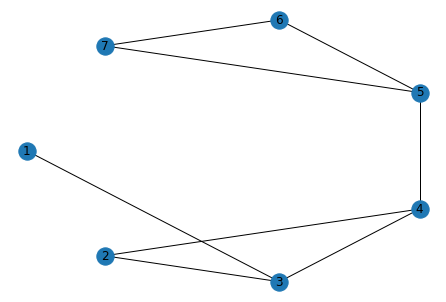

In [ ]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
G.add_edges_from([(1, 3), (2, 3), (2, 4), (3, 4), (4, 5), (5, 6), (5, 7), (6, 7)])
nx.draw_shell(G, with_labels=True)

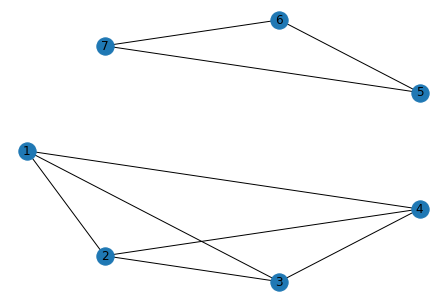

In [ ]:
M = BBC(G)
nx.draw_shell(M.G, with_labels=True)

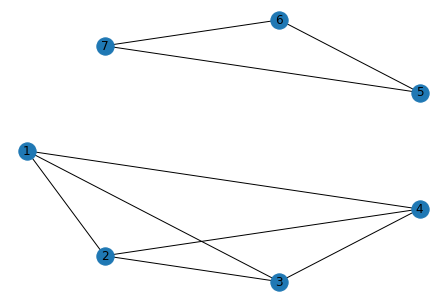

In [ ]:
M = CSW(G)
nx.draw_shell(M.G, with_labels=True)

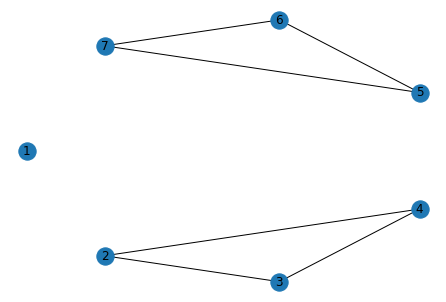

In [ ]:
M = A1(G, len(G.nodes))
nx.draw_shell(M.G, with_labels=True)

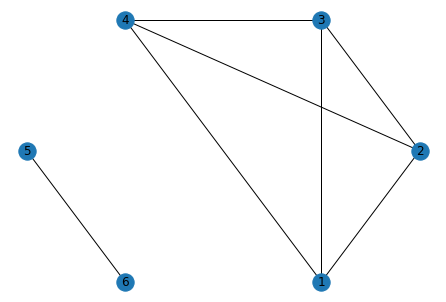

In [ ]:
M = A2(G, len(G.nodes))
nx.draw_shell(M.G, with_labels=True)

# Comparison

In [ ]:
def RandomGraph(n: int) -> nx.Graph:
    G = nx.Graph()
    G.add_nodes_from(list(np.arange(n)))
    for edge in itertools.combinations(G.nodes, 2):
        if random.random() <= 0.5:
            G.add_edge(edge[0], edge[1])
    return G

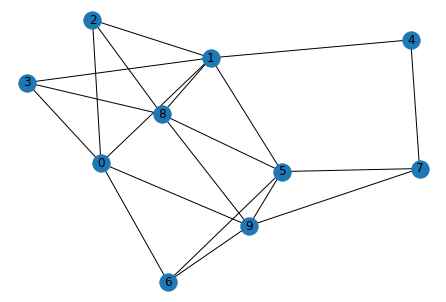

In [ ]:
G = RandomGraph(10)
nx.draw(G, with_labels=True)

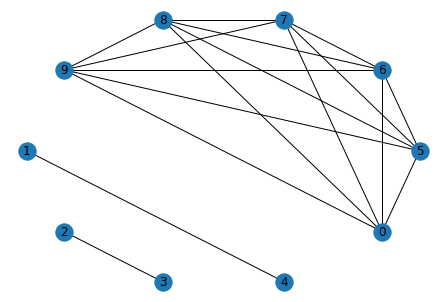

In [ ]:
M_1 = A1(G, len(G.nodes))
nx.draw_shell(M_1.G, with_labels=True)

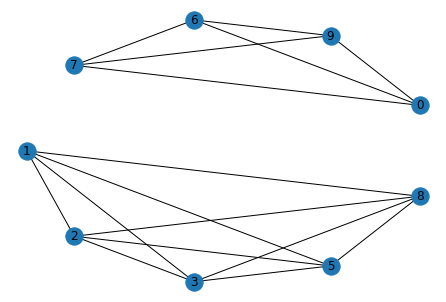

In [ ]:
M_2 = A2(G, len(G.nodes))
nx.draw_shell(M_2.G, with_labels=True)

In [ ]:
print("p on A_1: ", distance(G, M_1.G))
print("p on A_2: ", distance(G, M_2.G))

p on A_1:  17
p on A_2:  18


In [ ]:
x = np.arange(20) + 10

A_1_y = np.zeros_like(x)
A_2_y = np.zeros_like(x)
i = 0
for v in x:
    print("iter", i)

    A_1_results = np.zeros(50)
    A_2_results = np.zeros(50)
    for j in range(50):

      G = RandomGraph(v)
      A_1 = A1(G, len(G.nodes))
      A_2 = A2(G, len(G.nodes))

      A_1_results[j] = distance(G, A_1.G)
      A_2_results[j] = distance(G, A_2.G)

    A_1_y[i] = np.mean(A_1_results)
    A_2_y[i] = np.mean(A_2_results)
    
    i = i + 1
    

iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14
iter 15
iter 16
iter 17
iter 18
iter 19


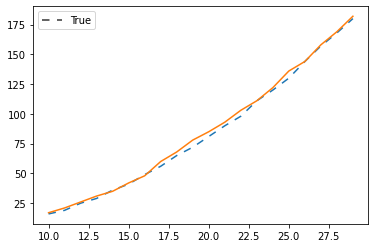

In [ ]:
import seaborn as sns

sns.lineplot(x = x, y = A_1_y, style=True, dashes=[(5,5)])
sns.lineplot(x = x, y = A_2_y)